# Charpter 2.  Classification on Digit Recognition

Author: Jiqian Dong (dong282@purdue.edu)

Time: 2020-09-24

## Introduction
Autonomous driving is a comprehensive multitask mission. It has a number of submodules including:
- perception
- fusion
- motion planning
- control

From the beginning, perception is a great challenge since the vehicles should be able to __understand__ the surrounding environment. Thanks to machine learning, we can accomplish many hard computer vision tasks. Among these tasks, image classification (recognition) is probably the most elementary and fundmental one. With the help of machine learning classification algorithms, the image recognition is no longer unachievable.

Let's play with classification algorithms to build our first digit recognition system ! Boiler Up!


In the lecture in Charp 1, Prof.Chen talked about classical classification methods including: 

- Logistic Regression
- Support Vector Machine
- KNN
- Decision Trees
- Ensemble methods (Random Forest, XGBoost)
- (deep learning method)


In this tutorial, we provide the simplest version of these classification methods with using Scikit-Learn (sklearn) package. You will see even with these simple traditional statistic machine learning method, we can reach 90% percent of accuracy.

In [1]:
# import the essential modules
import sklearn
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
 
print(sklearn.__version__)
print(np.__version__)
print(matplotlib.__version__)

0.23.2
1.18.4
3.1.0


## 1. Load the data set
In this chapter, we will be using the MNIST dataset, which is a set of 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau. Each image is labeled with the digit it represents.This set has been studied so much that it is often called the “Hello World” of Machine Learning. Scikit-Learn provides many helper functions to download popular datasets.

***Warning!!*** Before start, be sure to create a new directory named ``datasets`` in the same folder as this notebook for storing the downloaded dataset, otherwise the sklearn will download the dataset into a default directory. ex) ‘~/scikit_learn_data’. You may have trouble find it!

In [2]:
# This may take a while to run.... approximately 10 minutes or the first time to run

from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', data_home='./datasets', version=1, return_X_y=True) # this will directly give you the data X and label y

In [3]:
X.shape,y.shape

((70000, 784), (70000,))

## 2. Let's do some visualization first

(-0.5, 27.5, 27.5, -0.5)

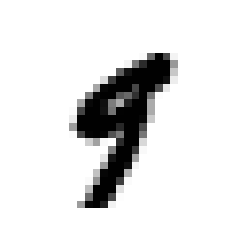

In [4]:
# plot one image 
some_digit = X[36000] #X[36000,:]
some_digit_image = some_digit.reshape(28, 28) # The image is flattened as a row of X matrix
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")

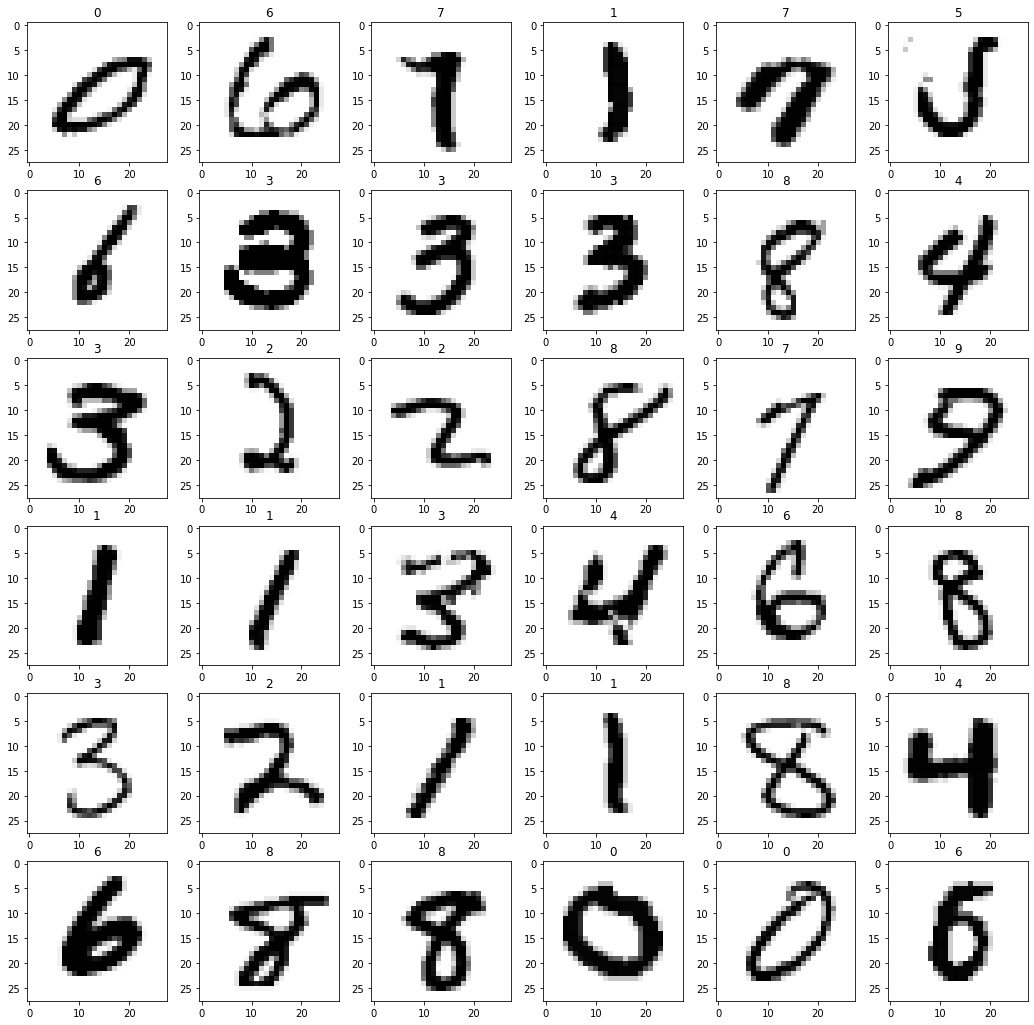

In [5]:
fig, axs = plt.subplots(6, 6, figsize=(18,18))
for i in range(6):
    for j in range(6):
        ind = np.random.randint(1,len(X))
        axs[i,j].imshow(X[ind].reshape(28,28), cmap='binary') # you can find other colormaps on https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
        axs[i,j].set_title(y[ind])
#         axs[i,j].axis('off')

##  3. Reduce the size of dataset

Since the original dataset is too big, it will take too much time to train, we select 1000 randomly for demostration. 

***Remark: If your laptop is really powerful, please feel free to delete the following cell and toy the entire dataset***. 

Shortcut for deleting cell: click the left part (right below the ```In [] ```) to select the cell, The left vertical color bar will turn blue if it is selected. Then press ```d``` twice. 

In [6]:
PLAY_SIZE = 1000

indice = np.random.choice(np.arange(len(X)), size=PLAY_SIZE, replace=False) # Random select without replacement
X = X[indice]
y = y[indice]

print(X.shape, y.shape)

(1000, 784) (1000,)


We need to further make sure the distribution of selected dataset is evenly distributed among all the digits, otherwise the results can be biased.

<function matplotlib.pyplot.xticks(ticks=None, labels=None, **kwargs)>

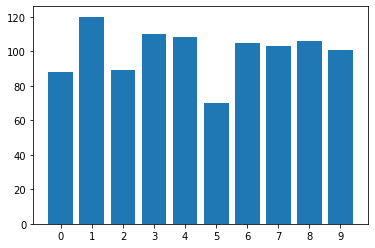

In [7]:
# check if our random choice is truely random, we can plot the count w.r.t value of y

vals, count = np.unique(y,return_counts=True)
plt.bar(vals,count)
plt.xticks

# Each bar should have similar height

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=511) #2/3 dataset is used for training


In [9]:
# model evaluation metrics
from sklearn.metrics import plot_confusion_matrix

## 4. Try our digit recognition algorithms

In [10]:
# We can first define some evaluation metrics for comparing the methods

### plot the confusion matrix   
def DrawConfusionMatrix(model, X_test, y_test, title=None):
    disp = plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
    disp.figure_.set_size_inches(10,10)
    disp.ax_.set_title(title)
    plt.show()


#### 4.1 Logistic Regression model

Train accuracy: 1.0;
Test accuracy: 0.8787878787878788


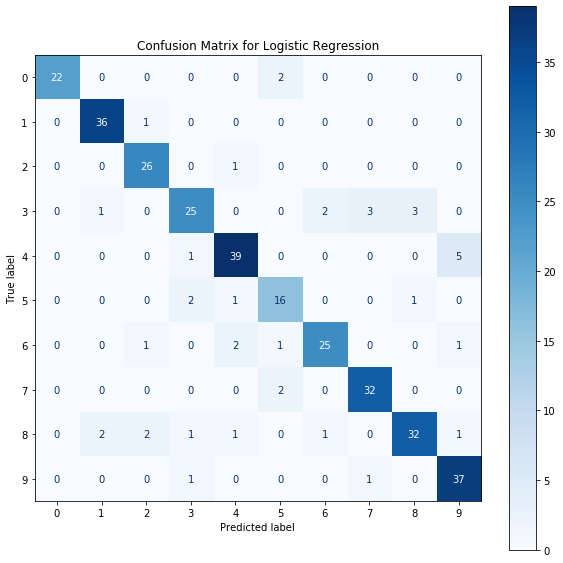

In [11]:
from sklearn.linear_model import LogisticRegression

# Train
logistic_clf = LogisticRegression(max_iter=500)
logistic_clf.fit(X_train,y_train)

# Evaluate the accuracy
train_accuracy = logistic_clf.score(X_train,y_train)
test_accuracy = logistic_clf.score(X_test,y_test)
print("Train accuracy: {};\nTest accuracy: {}".format(train_accuracy,test_accuracy))

DrawConfusionMatrix(logistic_clf, X_test, y_test, "Confusion Matrix for Logistic Regression")

### 4.2  SVM classfier

In [12]:
from sklearn.svm import SVC

def TrainSVM(kernel):
    svm_clf = SVC(kernel=kernel)
    svm_clf.fit(X_train,y_train)
    return svm_clf
    
def EvaluateSVM(model,kernel):
    train_accuracy = model.score(X_train,y_train)
    test_accuracy = model.score(X_test,y_test)
    print("For SVM classifier with: %s kernel:"%kernel)
    print("Train accuracy: {};\nTest accuracy: {}".format(train_accuracy,test_accuracy))


In [13]:
kernels = ['linear','rbf']
svm_clf_dic = {}
for k in kernels:
    svm_clf_dic[k] = TrainSVM(k)
    title = "Confusion Matrix of SVM classifer with %s kernel"%k
    EvaluateSVM(svm_clf_dic[k],k)

For SVM classifier with: linear kernel:
Train accuracy: 1.0;
Test accuracy: 0.8818181818181818
For SVM classifier with: rbf kernel:
Train accuracy: 0.991044776119403;
Test accuracy: 0.9121212121212121


###  Comment: The RBF kernel increase the test accuracy

### 4.3 KNN classifier

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
# Try with different number of neighbors
ks = [1,3,5,10,20]

def KNN_train(X_train,y_train,k):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    return model

def EvaluateKNN(model,k):
    train_accuracy = model.score(X_train,y_train)
    test_accuracy = model.score(X_test,y_test)
    print("For KNN classifier with %d neighbors:"%k)
    print("Train accuracy: {};\nTest accuracy: {} \n".format(train_accuracy,test_accuracy))
    
knn_clf_dic = {k:KNN_train(X_train,y_train,k) for k in ks} # inline iteration for dictionaries
for k,clf in knn_clf_dic.items():
    EvaluateKNN(clf, k)


For KNN classifier with 1 neighbors:
Train accuracy: 1.0;
Test accuracy: 0.8636363636363636 

For KNN classifier with 3 neighbors:
Train accuracy: 0.9388059701492537;
Test accuracy: 0.8484848484848485 

For KNN classifier with 5 neighbors:
Train accuracy: 0.908955223880597;
Test accuracy: 0.8575757575757575 

For KNN classifier with 10 neighbors:
Train accuracy: 0.8671641791044776;
Test accuracy: 0.8333333333333334 

For KNN classifier with 20 neighbors:
Train accuracy: 0.8119402985074626;
Test accuracy: 0.8121212121212121 



### 4.4 Decision Tree classifier

In [16]:
from sklearn.tree import DecisionTreeClassifier

# Test different depth of tree
max_depth_list = [None, 5, 10, 15]


def DT_train(X_train, y_train, depth):
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X_train, y_train)
    return model

def EvaluateDT(model, depth):
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    if not depth:
        print("For fully spanned decision tree with default depth")
    else:
        print("For decision tree with depth %d "%depth)
    print("Train accuracy: {};\nTest accuracy: {} \n".format(train_accuracy, test_accuracy))


dt_model_list = [DT_train(X_train, y_train, d) for d in max_depth_list] # a list of decision tree models
    
_ = [EvaluateDT(clf,d) for (clf,d) in zip(dt_model_list, max_depth_list)]

For fully spanned decision tree with default depth
Train accuracy: 1.0;
Test accuracy: 0.6242424242424243 

For decision tree with depth 5 
Train accuracy: 0.764179104477612;
Test accuracy: 0.6 

For decision tree with depth 10 
Train accuracy: 0.9925373134328358;
Test accuracy: 0.6515151515151515 

For decision tree with depth 15 
Train accuracy: 1.0;
Test accuracy: 0.6545454545454545 



***Remark***: increase the number of max depth in decision tree will increase the flexibility of the model and thus increase the train accuracy. However, simple decision tree doesn't seem to be proper in this task since the test accuracy is really low

### 4.5 Random Forest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier
import time

def RF_train(X_train,y_train):
    model = RandomForestClassifier(n_estimators=400,
                                   max_depth=150,
                                   n_jobs=1,
                                  )
    model.fit(X_train, y_train)
    return model

def EvaluateRF(model):
    train_accuracy = model.score(X_train,y_train)
    test_accuracy = model.score(X_test,y_test)
    print("For random forest classifier: ")
    print("Train accuracy: {};\nTest accuracy: {} \n".format(train_accuracy,test_accuracy))
    
start = time.time()
rf_clf = RF_train(X_train,y_train)
EvaluateRF(rf_clf)
end = time.time()

print("Computation time = ", end-start)

For random forest classifier: 
Train accuracy: 1.0;
Test accuracy: 0.9090909090909091 

Computation time =  1.269049882888794


***Remark:*** For tree based methods (decision tree, random forest, etc.) we can obtain the feature importance to see what are the most informative and representative features in the training data.  This can be useful in feature selection since we can cut many redundent feature

However, in this digit recognition case, it may not be meaningful since each feature is just one the pixel value among the $28\times28$ image. Only the combination of pixels is meaningful in representing digit numbers.

In [18]:
# Feature importance 
np.argsort(rf_clf.feature_importances_)[-10:] # The indice of 10 most informative features 

array([375, 318, 323, 437, 465, 489, 461, 377, 378, 350])

In [19]:
rf_clf.feature_importances_[0:28]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

From the visualization, we can see there is no pixel value in the first row of each image. The feature importance of first row (from 0-28 in indice) should be 0, as proved by previous cell. Therefore we can crop the first 28 columns of our X matrix without losing any useful information.

### 4.6 XGBoost

In [20]:
from xgboost import XGBClassifier

import time

def XGB_train(X_train,y_train):
    model = XGBClassifier(n_estimators=30,
                          max_depth=5,
                          n_jobs=1)
    model.fit(X_train, y_train)
    return model

def EvaluateXGB(model):
    train_accuracy = model.score(X_train,y_train)
    test_accuracy = model.score(X_test,y_test)
    print("For XGBoost classifier: ")
    print("Train accuracy: {};\nTest accuracy: {} \n".format(train_accuracy,test_accuracy))
    
start = time.time()
xgb_clf = XGB_train(X_train,y_train)
EvaluateXGB(xgb_clf)
end = time.time()

print("Computation time = ", end-start)

For XGBoost classifier: 
Train accuracy: 1.0;
Test accuracy: 0.8484848484848485 

Computation time =  6.071100950241089


### 4.7 First glimps in deep learning
In this section we will use the Multilayer Perceptron algorithm in sklearn for digit recognition

In [21]:
from sklearn.neural_network import MLPClassifier

In [22]:
# set the configurations
config = {}
config['hidden_layer_sizes'] = (300,100)
config['activation'] = 'relu'
config['solver'] = 'adam'
config['batch_size'] = 32
config['learning_rate'] = 'constant'
config['verbose'] = True

In [23]:
mlp_clf = MLPClassifier(**config)
# mlp_clf = MLPClassifier('hidden_layer_sizes'=(300,100),'activation')
mlp_clf.fit(X_train,y_train)

Iteration 1, loss = 15.93127923
Iteration 2, loss = 4.22735584
Iteration 3, loss = 1.13924316
Iteration 4, loss = 0.24507925
Iteration 5, loss = 0.15741569
Iteration 6, loss = 0.29423202
Iteration 7, loss = 0.14661929
Iteration 8, loss = 0.08141836
Iteration 9, loss = 0.10434251
Iteration 10, loss = 0.01584771
Iteration 11, loss = 0.00232941
Iteration 12, loss = 0.00189231
Iteration 13, loss = 0.00087841
Iteration 14, loss = 0.00075044
Iteration 15, loss = 0.00073527
Iteration 16, loss = 0.00073059
Iteration 17, loss = 0.00072864
Iteration 18, loss = 0.00072723
Iteration 19, loss = 0.00072632
Iteration 20, loss = 0.00072562
Iteration 21, loss = 0.00072473
Iteration 22, loss = 0.00072425
Iteration 23, loss = 0.00072364
Iteration 24, loss = 0.00072324
Iteration 25, loss = 0.00072285
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(batch_size=32, hidden_layer_sizes=(300, 100), verbose=True)

In [24]:
def EvaluateMLP(model):
    train_accuracy = model.score(X_train,y_train)
    test_accuracy = model.score(X_test,y_test)
    print("For MLP classifier: ")
    print("Train accuracy: {};\nTest accuracy: {} \n".format(train_accuracy,test_accuracy))

EvaluateMLP(mlp_clf)

For MLP classifier: 
Train accuracy: 1.0;
Test accuracy: 0.8424242424242424 



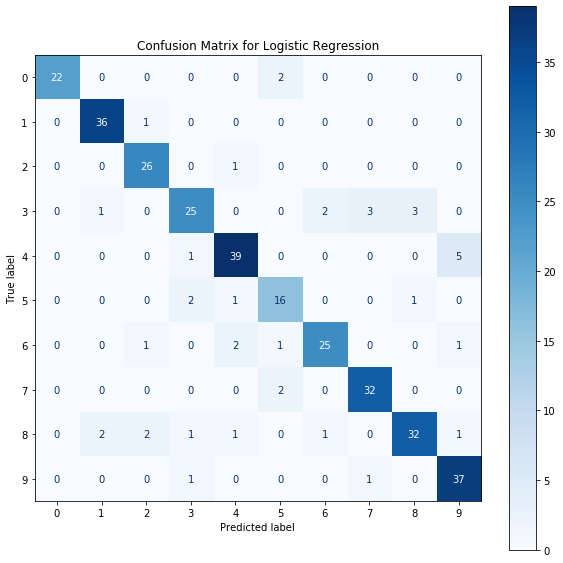

In [25]:
DrawConfusionMatrix(logistic_clf, X_test, y_test, "Confusion Matrix for Logistic Regression")

## Bonus

let's visualize some false predicted samples

In [26]:
best_model = svm_clf_dic['rbf']
best_model

SVC()

In [27]:
y_pred = best_model.predict(X_test)

In [28]:
wrong_indices = (y_pred != y_test) 
X_wrong = X_test[wrong_indices]
y_wrong = y_test[wrong_indices]
y_wrong_predict = y_pred[wrong_indices]
X_wrong.shape, y_wrong.shape

((29, 784), (29,))

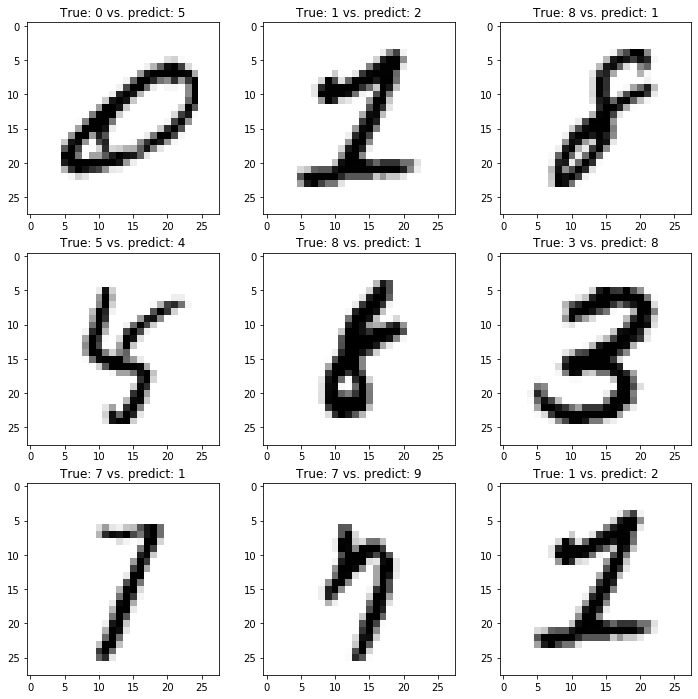

In [29]:
fig, axs = plt.subplots(3, 3, figsize=(12,12))
for i in range(3):
    for j in range(3):
        ind = np.random.randint(1,len(X_wrong))
        axs[i,j].imshow(X_wrong[ind].reshape(28,28), cmap='binary') # you can find other colormaps on https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
        title = "True: %s"%y_wrong[ind] + " vs. predict: %s"%y_wrong_predict[ind]
        axs[i,j].set_title(title)
#         axs[i,j].axis('off')